Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

        High       0.88      0.94      0.91        64
      Medium       0.88      0.78      0.82        36

    accuracy                           0.88       100
   macro avg       0.88      0.86      0.87       100
weighted avg       0.88      0.88      0.88       100



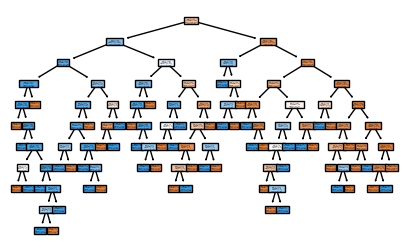

In [10]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

data = pd.read_csv("Admission_Predict_Ver1.1_small_data_set_for_Linear_Regression.csv",)
#data.head(400)
#discretize column into three classes: 'Low', 'Medium', 'High'
bins = [0,0.33,0.66,1]
labels = ['Low','Medium','High']
data['Admit_Class'] = pd.cut(data['Chance of Admit '], bins=bins, labels=labels, include_lowest=True)
data = data.drop(['Chance of Admit '], axis =1)

#convert admit_class to a categorical type
data['Admit_Class'] = data['Admit_Class'].astype('category')

#preparing data
x = data.drop(['Admit_Class'], axis=1)
y = data['Admit_Class']

#splitting data into training and test set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

#building tree model
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train) #train decision tree classifier
y_predict = clf.predict(x_test) #make predictions on test data

#Evaluate results
accuracy = accuracy_score(y_test, y_predict)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_predict))

#Vizualize tree
plt.figure(figsize=(5, 3))
plot_tree(clf, filled=True, feature_names=list(x.columns), class_names=labels)
plt.show()
